In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
train = pd.read_csv('../input/train_u6lujuX_CVtuZ9i.csv')
test = pd.read_csv('../input/test_Y3wMUE5_7gLdaTN.csv')

In [90]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


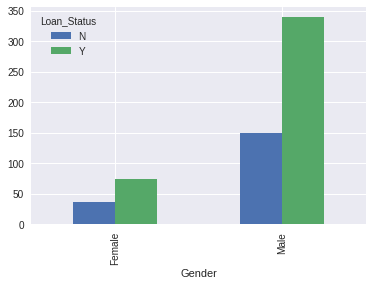

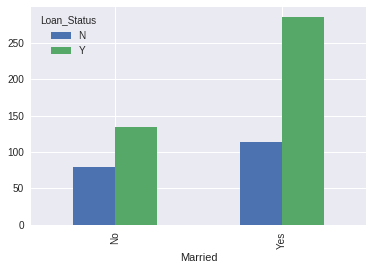

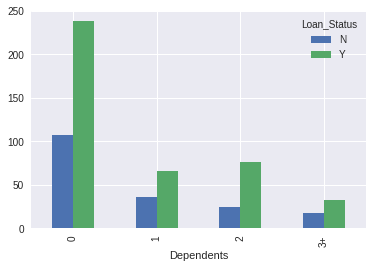

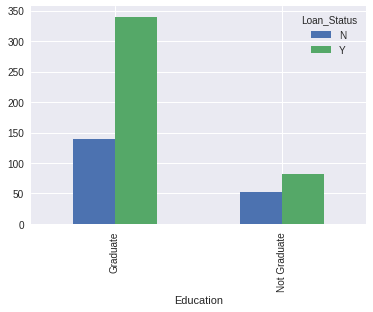

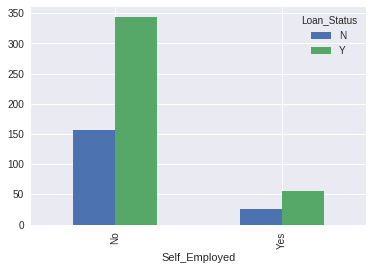

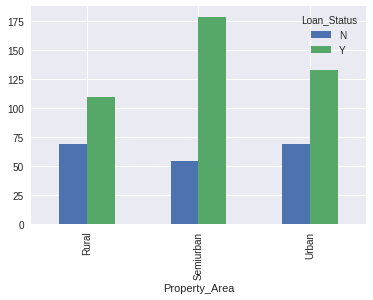

In [203]:
for col in train.columns[1:-1]:
    if train[col].dtype == 'object':        
        dfn = train.groupby([col, 'Loan_Status'])[col].count().unstack('Loan_Status')
        dfn.plot(kind='bar', stacked=False)

In [228]:
train[train.Loan_Status=='Y'].ApplicantIncome.mean()

5384.0687203791467

In [229]:
train[train.Loan_Status=='N'].ApplicantIncome.mean()

5446.078125

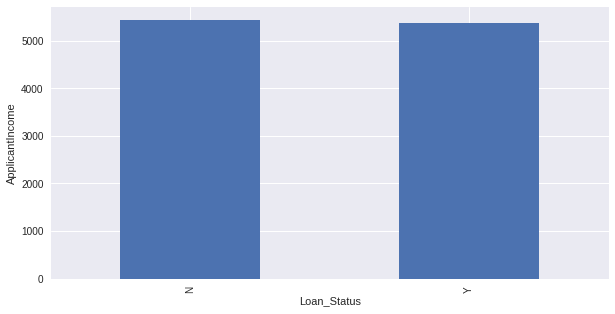

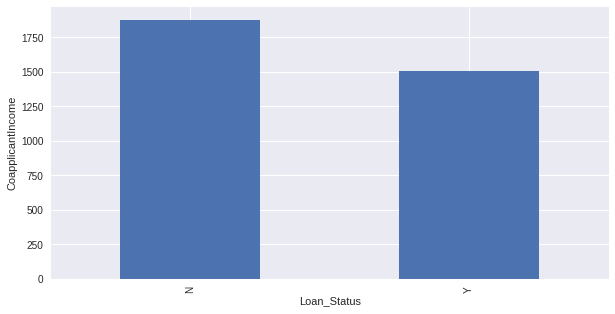

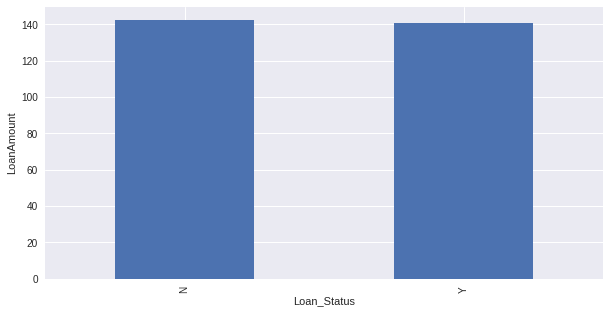

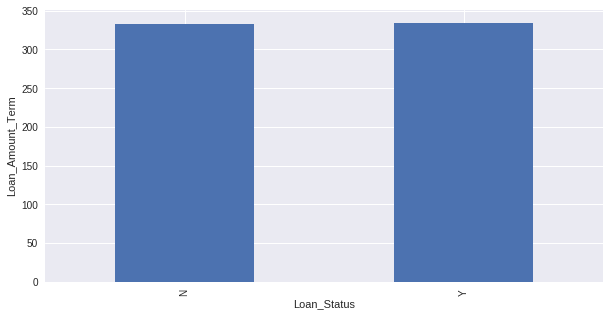

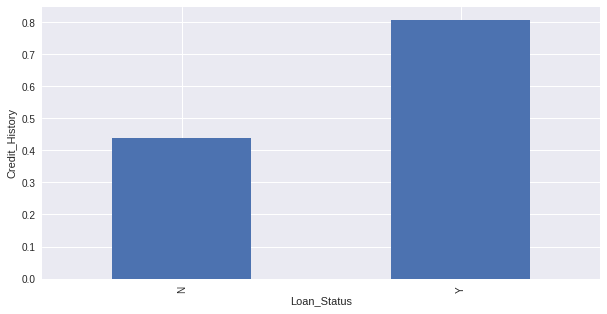

In [246]:
for n, col in enumerate(train.columns[1:-1]):    
    if train[col].dtype != 'object': 
        plt.figure(figsize=(10, 5))
        ax = train[[col, 'Loan_Status']].fillna(-1).groupby('Loan_Status')[col].agg('mean').plot(kind='bar')
        ax.set_ylabel(col)
        plt.figure(n)

In [257]:
pred = np.array([1,0,1,0,1,0,1])

In [259]:
for i in range(len(pred)):
    if pred[i]==1:
        pred[i]="Y"

ValueError: invalid literal for int() with base 10: 'Y'

In [252]:
pred

array([2, 0, 2, 0, 2, 0, 2])